In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('unusual_drop_preprocess_all_v4.csv')

In [3]:
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,...,total_rev_hi_lim,verification_status,emp_length,fico,credit_hist_months,have_bc,have_rev,treasury,funded_amnt,irr
0,0.0,8.0,OK,11.608245,8.702178,70.374384,0,0,1,34.70,...,10.317483,Verified,10+ years,672.0,278,1,1,0.000889,23200.0,-0.028885
1,0.0,5.0,TX,11.082158,10.919099,6.566836,0,0,0,17.74,...,11.157707,Not Verified,unknown,822.0,401,1,1,0.001392,16000.0,-0.016852
2,0.0,3.0,FL,10.819798,7.815207,73.376344,0,0,0,6.99,...,9.532569,Not Verified,5 years,702.0,226,1,1,0.001228,4500.0,0.008687
3,0.0,6.0,IL,11.002117,6.891626,91.072727,0,0,0,28.94,...,10.229260,Source Verified,10+ years,677.0,190,1,1,0.000841,20000.0,0.008325
4,0.0,5.0,NC,11.487854,9.901736,69.192901,0,0,0,10.31,...,11.302229,Verified,5 years,737.0,206,1,1,0.001805,19000.0,-0.087127


In [4]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: acc_now_delinq
1: acc_open_past_24mths
2: addr_state
3: annual_inc
4: bc_open_to_buy
5: bc_util
6: chargeoff_within_12_mths
7: collections_12_mths_ex_med
8: delinq_2yrs
9: dti
10: grade
11: home_ownership
12: id
13: inq_last_6mths
14: installment
15: int_rate
16: issue_d
17: loan_amnt
18: loan_status
19: loan_status_label
20: mo_sin_old_il_acct
21: mo_sin_old_rev_tl_op
22: mo_sin_rcnt_rev_tl_op
23: mo_sin_rcnt_tl
24: mort_acc
25: mths_since_last_delinq
26: mths_since_last_major_derog
27: mths_since_last_record
28: mths_since_rcnt_il
29: mths_since_recent_bc
30: mths_since_recent_bc_dlq
31: mths_since_recent_inq
32: mths_since_recent_revol_delinq
33: num_accts_ever_120_pd
34: num_actv_bc_tl
35: num_actv_rev_tl
36: num_bc_sats
37: num_bc_tl
38: num_il_tl
39: num_op_rev_tl
40: num_rev_accts
41: num_tl_120dpd_2m
42: num_tl_30dpd
43: num_tl_90g_dpd_24m
44: num_tl_op_past_12m
45: open_acc
46: pct_tl_nvr_dlq
47: pub_rec
48: pub_rec_bankruptcies
49: purpose
50: revol_bal
51: revol_util
52: 

In [5]:
# 범주형 변수들 -> 원핫인코딩

with open('categorical_cols_v1.txt', 'r', encoding='utf-8') as f:
    cat_columns_v1 = [line.strip() for line in f if line.strip() != '']

# columns=cat_columns_v1 (리스트 그대로 전달)
df = pd.get_dummies(df, columns=cat_columns_v1, drop_first=True)

# 원본 컬럼 제거: 이미 get_dummies에서 제거되므로, 보통 이 라인은 필요 없음
# 하지만 혹시 모르니 아래처럼, 변수명을 일치시키세요.
df = df.drop(cat_columns_v1, axis=1, errors='ignore')


In [6]:
df.head()

,acc_now_delinq,acc_open_past_24mths,annual_inc,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,id,...,mths_since_recent_revol_delinq_<1yr,mths_since_recent_revol_delinq_unknown,verification_status_Source Verified,verification_status_Verified,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0.0,8.0,11.608245,8.702178,70.374384,0,0,1,34.70,84253847,...,True,False,False,True,False,False,False,True,False,False
1,0.0,5.0,11.082158,10.919099,6.566836,0,0,0,17.74,119708428,...,False,True,False,False,False,False,False,False,False,False
2,0.0,3.0,10.819798,7.815207,73.376344,0,0,0,6.99,109906493,...,False,True,False,False,True,False,False,False,False,False
3,0.0,6.0,11.002117,6.891626,91.072727,0,0,0,28.94,60286250,...,False,False,True,False,True,False,False,False,False,False
4,0.0,5.0,11.487854,9.901736,69.192901,0,0,0,10.31,151871973,...,False,True,False,True,False,False,True,False,False,False


In [7]:
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)

Index(['issue_d', 'loan_status_label', 'sub_grade'], dtype='object')


In [8]:
with open('selected_cols_v1.txt', 'r', encoding='utf-8') as f:
    selected_cols_v1 = [line.strip() for line in f if line.strip()]

In [9]:
# 'int_rate'를 연 이자율 퍼센트 단위 -> 월 이자율, 소수 단위로 바꾸기
df['int_rate'] = (1 + df['int_rate']/100) ** (1/12) - 1

In [10]:
df['int_rate'].head()

0    0.018762
1    0.005709
2    0.008294
3    0.007967
4    0.013867
Name: int_rate, dtype: float64

In [11]:
# 다중공선성 고려하여 sub_grade와 loan_status_label은 제거, issue_d도 제거
df = df.drop(['issue_d', 'sub_grade', 'loan_status_label'], axis = 1)

In [12]:
df_sel = df[selected_cols_v1]
df_sel = pd.concat([df_sel, df['int_rate'], df['treasury'], df['loan_status'], df['funded_amnt'], df['irr']], axis=1)

In [13]:
# 범주형 변수가 남아있는 게 있는지 확인
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)

Index([], dtype='object')


In [14]:
print(list(df.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'id', 'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'tax_liens', 'term', 'tot_coll_amt', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_pymnt', 'total_rev_hi_lim', 'fico', 'credit_hist_months', 'have_bc', 'have_rev', 'treasury', 'funded_amnt', 'irr', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL'

In [15]:
print(list(df_sel.columns))

['mo_sin_old_rev_tl_op', 'open_acc', 'num_tl_30dpd', 'mo_sin_rcnt_tl', 'acc_open_past_24mths', 'mort_acc', 'collections_12_mths_ex_med', 'tot_hi_cred_lim', 'total_rev_hi_lim', 'num_rev_accts', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_il_acct', 'num_accts_ever_120_pd', 'revol_bal', 'num_actv_rev_tl', 'term', 'num_bc_tl', 'acc_now_delinq', 'dti', 'fico', 'num_actv_bc_tl', 'pct_tl_nvr_dlq', 'num_il_tl', 'bc_open_to_buy', 'pub_rec', 'bc_util', 'revol_util', 'num_bc_sats', 'delinq_2yrs', 'total_bal_ex_mort', 'total_acc', 'num_tl_op_past_12m', 'have_bc', 'credit_hist_months', 'have_rev', 'tot_coll_amt', 'annual_inc', 'pub_rec_bankruptcies', 'num_op_rev_tl', 'num_tl_120dpd_2m', 'tax_liens', 'chargeoff_within_12_mths', 'num_tl_90g_dpd_24m', 'int_rate', 'treasury', 'loan_status', 'funded_amnt', 'irr']


In [16]:
# 우수사례 예시와 같이 모델1의 목적함수는 loan_status 예측하기
X = df_sel.drop(['loan_status', 'funded_amnt', 'irr'], axis=1)
meta = df_sel[['funded_amnt', 'treasury', 'irr']]
y = df_sel['loan_status']

In [17]:
# 3대 1로 train set, validation set 나누기
X_tr,X_val,y_tr,y_val, meta_tr, meta_val = train_test_split(
    X,y, meta, test_size=0.25, random_state=111
)

In [18]:
# train data에 대한 선형 회귀분석
lpm = LinearRegression()
lpm.fit(X_tr,y_tr)

LinearRegression()

In [19]:
# 계수를 편하게 보기 위해 데이터프레임으로 바꿈
coeff = pd.DataFrame(lpm.coef_, index=X_tr.columns, columns=["coefficient"])
coeff.head(15)

,coefficient
mo_sin_old_rev_tl_op,-0.028734
open_acc,-0.010026
num_tl_30dpd,0.013033
mo_sin_rcnt_tl,-0.006855
acc_open_past_24mths,0.008222
mort_acc,-0.007012
collections_12_mths_ex_med,0.018912
tot_hi_cred_lim,-0.018168
total_rev_hi_lim,0.000327
num_rev_accts,0.004252


In [20]:
corr_matrix = X.corr()
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 긴 형태로 변환 후, 결측치 제외
corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['var1', 'var2', 'correlation']

# 절대값 기준으로 내림차순 정렬
corr_pairs['abs_corr'] = corr_pairs['correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='abs_corr', ascending=False)

# 결과 확인 (상위 20개 쌍 예시)
print(corr_pairs.head(20))

                     var1                   var2  correlation  abs_corr
388         num_rev_accts          num_op_rev_tl     0.861469  0.861469
792               pub_rec   pub_rec_bankruptcies     0.842094  0.842094
696        num_actv_bc_tl            num_bc_sats     0.829031  0.829031
366         num_rev_accts              num_bc_tl     0.799980  0.799980
32   mo_sin_old_rev_tl_op     credit_hist_months     0.792315  0.792315
548       num_actv_rev_tl          num_op_rev_tl     0.788141  0.788141
530       num_actv_rev_tl         num_actv_bc_tl     0.783553  0.783553
800               bc_util             revol_util     0.774368  0.774368
101          num_tl_30dpd         acc_now_delinq     0.772160  0.772160
135        mo_sin_rcnt_tl  mo_sin_rcnt_rev_tl_op     0.753000  0.753000
72               open_acc              total_acc     0.723964  0.723964
913               have_bc               have_rev     0.718358  0.718358
196  acc_open_past_24mths     num_tl_op_past_12m     0.707558  0

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X에 상수항이 없으면 추가
import statsmodels.api as sm
X_const = sm.add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)

                       feature          VIF
0                        const  3092.671764
1         mo_sin_old_rev_tl_op     3.603596
2                     open_acc     7.425020
3                 num_tl_30dpd     3.213213
4               mo_sin_rcnt_tl     2.833014
5         acc_open_past_24mths     2.890079
6                     mort_acc     2.092972
7   collections_12_mths_ex_med     1.073416
8              tot_hi_cred_lim     3.088105
9             total_rev_hi_lim     8.811529
10               num_rev_accts    24.237161
11       mo_sin_rcnt_rev_tl_op     2.796775
12          mo_sin_old_il_acct     1.774591
13       num_accts_ever_120_pd     1.724308
14                   revol_bal    10.181679
15             num_actv_rev_tl     6.808653
16                        term     1.444460
17                   num_bc_tl     7.067185
18              acc_now_delinq     3.705361
19                         dti     2.056042
20                        fico     2.696025
21              num_actv_bc_tl  

In [22]:
print(coeff.sort_values('coefficient', ascending=False).head(10))

                            coefficient
treasury                      38.580860
int_rate                      17.391158
collections_12_mths_ex_med     0.018912
num_tl_90g_dpd_24m             0.015693
delinq_2yrs                    0.014112
num_tl_30dpd                   0.013033
revol_util                     0.009511
pub_rec                        0.008271
acc_open_past_24mths           0.008222
tax_liens                      0.007308


In [23]:
# 모델 불러오고, fit하고 예측하는 순서대로 진행됨
y_val_pred=lpm.predict(X_val)
y_val_pred

array([0.59856195, 0.20763186, 0.09959154, ..., 0.25926399, 0.16533846,
       0.27113108])

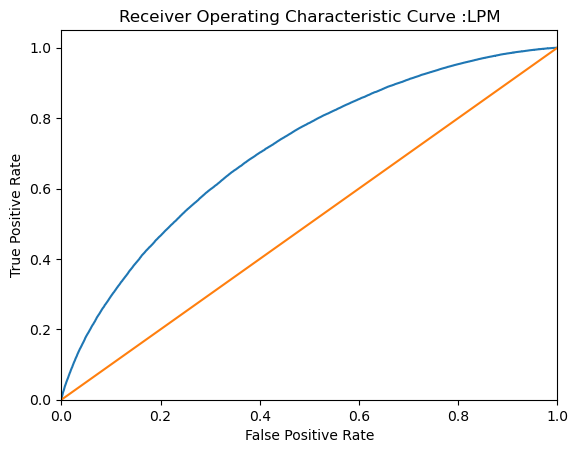

In [24]:
# roc_curve로 하이퍼파라미터 정해보기
from sklearn.metrics import confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve :LPM')

plt.show()

In [25]:
roc_auc = auc(fpr,tpr)
roc_auc

0.7086596881008425

In [26]:
# j_score - 단순하게 true positive rate와 false positive rate 간 거리가 가장 먼 값을 hyperparameter로 지정
# 여기서 optimal threshold는 오직 부도 예측에만 관한 것
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.4f}")

Optimal threshold: 0.2074


In [27]:
def calc_sharpe_by_thresholds_stat_econ(model, X_val_model, X_val, y_val, irr_col='irr', treasury_col='treasury'):
    # X_val_model: drop_cols가 이미 적용된 DataFrame
    val_pred_prob = model.predict_proba(X_val_model)[:, 1]
    thresholds = np.linspace(0.01, 0.99, 100)
    sharpe_ratios = []

    for t in thresholds:
        val_binary = np.where(val_pred_prob > t, 1, 0)
        val_return = []
        for pred, actual, irr, treasury in zip(val_binary, y_val, X_val[irr_col], X_val[treasury_col]):
            if pred == 0:
                if actual == 1:
                    val_return.append(irr)
                else:
                    val_return.append(irr)
            else:
                val_return.append(treasury - irr)
        val_return = np.array(val_return)
        risk_free = np.array(X_val[treasury_col])
        excess_ret = val_return - risk_free
        if excess_ret.std() > 0:
            sharpe = excess_ret.mean() / excess_ret.std()
        else:
            sharpe = np.nan
        sharpe_ratios.append(sharpe)
    return thresholds, sharpe_ratios

In [28]:
import numpy as np

thresholds, sharpe_ratios = [], []

# meta_val에 'irr', 'treasury' 컬럼이 반드시 포함되어 있어야 함!
for t in np.linspace(0.01, 0.99, 100):
    # 회귀 예측값을 threshold 이상이면 1(loan_status=1), 아니면 0으로 간주
    val_binary = (y_val_pred > t).astype(int)
    val_return = []
    for pred, actual, irr, treasury in zip(val_binary, y_val, meta_val['irr'], meta_val['treasury']):
        if pred == 0:
            if actual == 1:
                val_return.append(irr)
            else:
                val_return.append(irr)
        else:
            val_return.append(treasury - irr)
    val_return = np.array(val_return)
    risk_free = np.array(meta_val['treasury'])
    excess_ret = val_return - risk_free
    if excess_ret.std() > 0:
        sharpe = excess_ret.mean() / excess_ret.std()
    else:
        sharpe = np.nan
    thresholds.append(t)
    sharpe_ratios.append(sharpe)

thresholds = np.array(thresholds)
sharpe_ratios = np.array(sharpe_ratios)

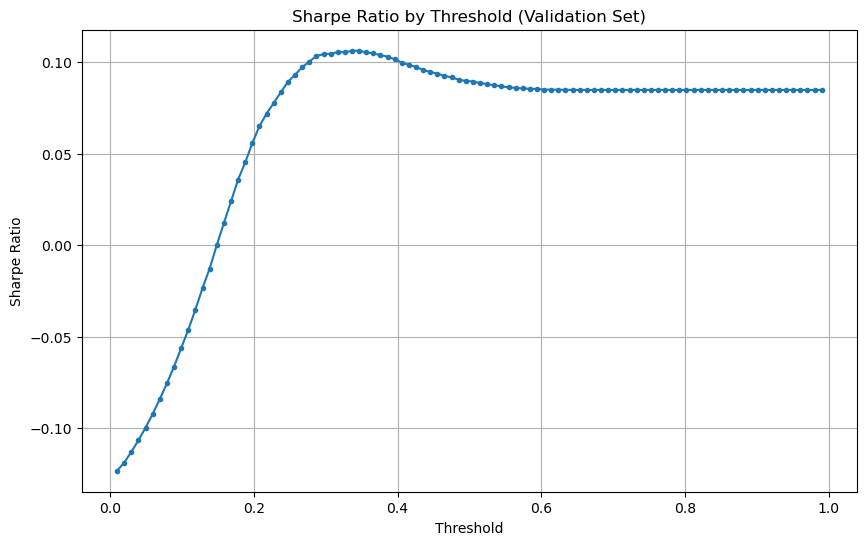

 Optimal Threshold: 0.347
 Max Sharpe Ratio: 0.1063


In [29]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sharpe_ratios, marker='o', markersize=3)
plt.xlabel("Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio by Threshold (Validation Set)")
plt.grid(True)
plt.show()

optimal_idx = np.nanargmax(sharpe_ratios)
optimal_threshold = thresholds[optimal_idx]
print(f" Optimal Threshold: {optimal_threshold:.3f}")
print(f" Max Sharpe Ratio: {sharpe_ratios[optimal_idx]:.4f}")


In [30]:
# optimal threshold를 정한 것을 바탕으로, validation dataset까지 모델에 넣어서 회귀모델 만들기
lpm = LinearRegression()
lpm.fit(X,y)

LinearRegression()

In [31]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


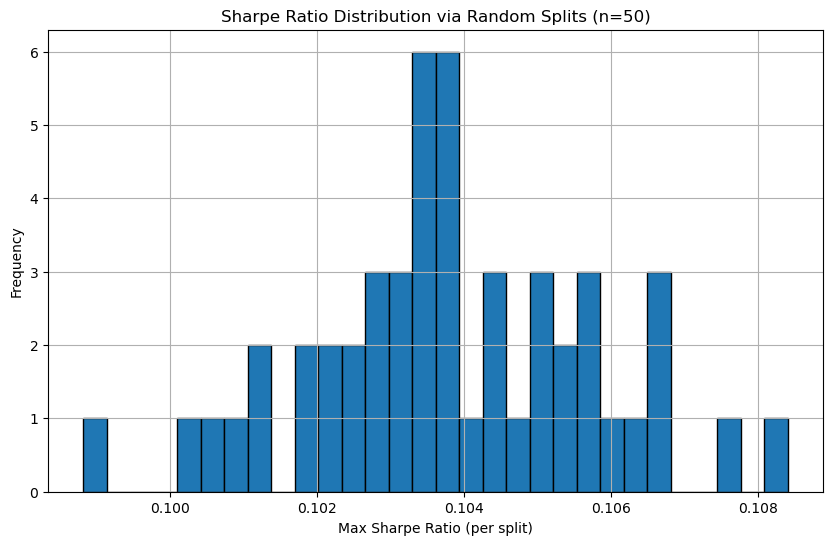

평균 Sharpe Ratio: 0.1038
최대 Sharpe Ratio: 0.1084
최소 Sharpe Ratio: 0.0988
중앙값 Sharpe Ratio: 0.1036
표준편차 Sharpe Ratio: 0.0019


In [34]:
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N_BOOTSTRAP = 50
thresholds = np.linspace(0.01, 0.99, 100)
    
def calc_max_sharpe(seed):
    X_tr, X_val, y_tr, y_val, meta_tr, meta_val = train_test_split(
        X, y, meta, test_size=0.25, random_state=seed
    )
    X_tr = X_tr.copy()
    X_val = X_val.copy()
    meta_tr = meta_tr.reset_index(drop=True)
    meta_val = meta_val.reset_index(drop=True)
    y_val = y_val.reset_index(drop=True)

    lpm = LinearRegression()
    lpm.fit(X_tr, y_tr)
    y_val_pred = lpm.predict(X_val)

    thresholds, sharpe_ratios = [], []
    for t in np.linspace(0.01, 0.99, 100):
        val_binary = (y_val_pred > t).astype(int)
        val_return = []
        for pred, actual, irr, treasury in zip(val_binary, y_val, meta_val['irr'], meta_val['treasury']):
            if pred == 0:  # 대출
                if actual == 1:  # 부도
                    val_return.append(irr)
                else:  # 정상
                    val_return.append(irr)
            else:  # 대출 X
                val_return.append(treasury - irr)
        val_return = np.array(val_return)
        risk_free = np.array(meta_val['treasury'])
        excess_ret = val_return - risk_free
        if excess_ret.std() > 0:
            sharpe = excess_ret.mean() / excess_ret.std()
        else:
            sharpe = np.nan
        thresholds.append(t)
        sharpe_ratios.append(sharpe)

    sharpe_ratios = np.array(sharpe_ratios)
    max_sharpe = np.nanmax(sharpe_ratios)
    return max_sharpe

# 병렬 실행 (n_jobs=6 또는 -1 등 적절히 설정)
sharpe_dist = Parallel(n_jobs=7)(
    delayed(calc_max_sharpe)(seed) for seed in range(N_BOOTSTRAP)
)

plt.figure(figsize=(10,6))
plt.hist(sharpe_dist, bins=30, edgecolor='k', alpha=1)
plt.xlabel("Max Sharpe Ratio (per split)")
plt.ylabel("Frequency")
plt.title("Sharpe Ratio Distribution via Random Splits (n=50)")
plt.grid(True)
plt.show()

print(f"평균 Sharpe Ratio: {np.nanmean(sharpe_dist):.4f}")
print(f"최대 Sharpe Ratio: {np.nanmax(sharpe_dist):.4f}")
print(f"최소 Sharpe Ratio: {np.nanmin(sharpe_dist):.4f}")
print(f"중앙값 Sharpe Ratio: {np.nanmedian(sharpe_dist):.4f}")
print(f"표준편차 Sharpe Ratio: {np.nanstd(sharpe_dist):.4f}")
